# Steps to follow to build recommendation system using collaborative filtering

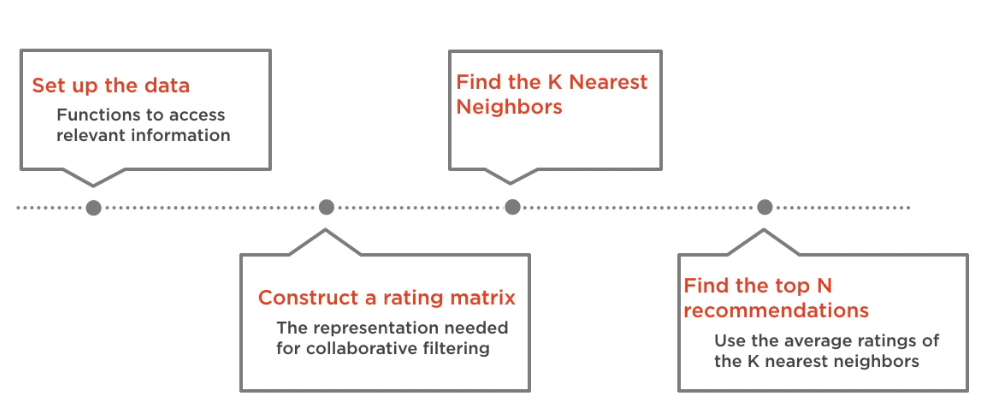

# Setup Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
# data from MovieLens|GroupLens (http://files.grouplens.org/datasets/movielens/ml-latest-small.zip)

movie_data = pd.read_csv('movies.csv',error_bad_lines=False, header=0, usecols=[0,1,2] ,index_col=0, names=['movieId', 'Title','Genre'])
movie_data.head()

,Title,Genre
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [3]:
movie_data.describe()

,Title,Genre
count,9125,9125
unique,9123,902
top,War of the Worlds (2005),Drama
freq,2,1170


In [4]:
movie_ratings = pd.read_csv('ratings.csv', error_bad_lines=False, usecols=[0,1,2],header=0, names=['userId','movieId', 'rating'] )
movie_ratings.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


In [5]:
movie_ratings.describe()

,userId,movieId,rating
count,100004.000000,100004.000000,100004.000000
mean,347.011310,12548.664363,3.543608
std,195.163838,26369.198969,1.058064
min,1.000000,1.000000,0.500000
25%,182.000000,1028.000000,3.000000
50%,367.000000,2406.500000,4.000000
75%,520.000000,5418.000000,4.000000
max,671.000000,163949.000000,5.000000


In [6]:
def movieTitle(movieId):
    title = movie_data.at[movieId, 'Title']
    return title
movieTitle(1)

'Toy Story (1995)'

In [7]:
def movieGenre(movieId):  
    genre = movie_data.at[movieId, 'Genre']
    return  genre
movieGenre(1)

'Adventure|Animation|Children|Comedy|Fantasy'

In [8]:
# Data Preprocessing for huge dataset (However here Not Required)
# to select only those movies whose id is present in movie_data
# movie_ratings = movie_ratings[movie_ratings['movieId'].isin(movie_data.index)]

In [9]:
def favMovie(userId, N):
    userRatings = movie_ratings[movie_ratings.userId==userId]
    sortedRatings = pd.DataFrame.sort_values(userRatings,['rating'] ,ascending=[0])[:N]
    sortedRatings['Title'] = sortedRatings['movieId'].apply(movieTitle)
    sortedRatings['Genre'] = sortedRatings['movieId'].apply(movieGenre)
    return sortedRatings
favMovie(1, 10)


,userId,movieId,rating,Title,Genre
4,1,1172,4.0,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama
13,1,2105,4.0,Tron (1982),Action|Adventure|Sci-Fi
12,1,1953,4.0,"French Connection, The (1971)",Action|Crime|Thriller
8,1,1339,3.5,Dracula (Bram Stoker's Dracula) (1992),Fantasy|Horror|Romance|Thriller
19,1,3671,3.0,Blazing Saddles (1974),Comedy|Western
1,1,1029,3.0,Dumbo (1941),Animation|Children|Drama|Musical
2,1,1061,3.0,Sleepers (1996),Thriller
14,1,2150,3.0,"Gods Must Be Crazy, The (1980)",Adventure|Comedy
17,1,2455,2.5,"Fly, The (1986)",Drama|Horror|Sci-Fi|Thriller
0,1,31,2.5,Dangerous Minds (1995),Drama


# Setup Rating Matrix

In [10]:
movie_ratings.shape, movie_data.shape

((100004, 3), (9125, 2))

In [11]:
userPerMovieID = movie_ratings.movieId.value_counts()
userPerMovieID.head()

356    341
296    324
318    311
593    304
260    291
Name: movieId, dtype: int64

In [12]:
userPerMovieID.shape

(9066,)

In [13]:
## Data Preprocessing to obtain less sparse matrix for huge dataset(However here Not Required)

    ## Take only those movies which are seen by more than 10 users
#movie_ratings = movie_ratings[movie_ratings.index.isin(userPerMovieID[userPerMovieID > 10].index)]
#movie_ratings.shape

In [14]:
userMovieRatingMatrix = pd.pivot_table(movie_ratings, index=['userId'],columns=['movieId'] ,values='rating')
userMovieRatingMatrix.head(10)

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Find K Nearest Neighbours

In [15]:
user1 = 100
user2 = 200

user1_ratings = userMovieRatingMatrix.transpose()[user1]
user1_ratings.head()

movieId
1    4.0
2    NaN
3    4.0
4    NaN
5    NaN
Name: 100, dtype: float64

In [16]:
user2_ratings = userMovieRatingMatrix.transpose()[user2]
user2_ratings.head()

movieId
1    3.0
2    3.5
3    NaN
4    NaN
5    NaN
Name: 200, dtype: float64

In [17]:
from scipy.spatial.distance import hamming
# hamming() returns a value which shows the pecentage of disagreement

hamming(user1_ratings, user1_ratings)


0.9972424442973749

In [18]:
# Wrapping it up in a function
def distance(user1, user2):
    try:
        user1_ratings = userMovieRatingMatrix.transpose()[user1]
        user2_ratings = userMovieRatingMatrix.transpose()[user2]
        distance = hamming(user1_ratings, user2_ratings)
    except:
        distance = np.nan
    return distance
distance(100,200)

1.0

In [19]:
user = 1
allusers = pd.DataFrame(userMovieRatingMatrix.index)
# Removing the activee user
allusers = allusers[allusers.userId != user]
allusers.head()

,userId
1,2
2,3
3,4
4,5
5,6


In [20]:
allusers['distance'] = allusers['userId'].apply(lambda x: distance(user, x))
allusers.head()

,userId,distance
1,2,1.00000
2,3,1.00000
3,4,0.99989
4,5,1.00000
5,6,1.00000


In [21]:
K = 10
KNearestUsers = allusers.sort_values(['distance'], ascending=True)['userId'][:K]
KNearestUsers

579    580
451    452
14      15
563    564
72      73
149    150
508    509
118    119
55      56
438    439
Name: userId, dtype: int64

In [22]:
# Wrapping it up in a function
def nearestNeighbours(user, K=10):
    allusers = pd.DataFrame(userMovieRatingMatrix.index)
    allusers = allusers[allusers.userId != user]
    allusers['distance'] = allusers['userId'].apply(lambda x: distance(user, x))
    KNearestUsers = allusers.sort_values(['distance'], ascending=True)['userId'][:K]
    return KNearestUsers

KNearestNeighbours = nearestNeighbours(1,5)
KNearestNeighbours

579    580
451    452
14      15
563    564
72      73
Name: userId, dtype: int64

# Find Top N Recommendations

In [23]:
# Nearest Neighbours ratings

NNratings = userMovieRatingMatrix[userMovieRatingMatrix.index.isin(KNearestNeighbours)]
NNratings

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
15,2.0,2.0,NaN,NaN,4.5,4.0,NaN,NaN,NaN,3.0,...,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,5.0,2.5,NaN,NaN,NaN,4.5,NaN,NaN,NaN,3.0,...,NaN,NaN,3.0,NaN,NaN,NaN,4.5,NaN,NaN,NaN
452,3.5,NaN,1.0,NaN,3.0,4.0,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
564,4.0,4.0,3.0,NaN,3.0,1.0,3.0,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
580,4.0,3.5,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#Getting the average rating of each movie seen by Nearest Neighbours of active user
avgRating = NNratings.apply(np.nanmean).dropna()
avgRating.head()

# warning where the columns of NNratings are completely empty(nan)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\apply.py:242: RuntimeWarning: Mean of empty slice
  labels=labels)


movieId
1    3.7
2    3.0
3    2.0
5    3.5
6    3.4
dtype: float64

In [25]:
moviesAlreadySeen = userMovieRatingMatrix.transpose()[user].dropna().index
moviesAlreadySeen

Int64Index([  31, 1029, 1061, 1129, 1172, 1263, 1287, 1293, 1339, 1343, 1371,
            1405, 1953, 2105, 2150, 2193, 2294, 2455, 2968, 3671],
           dtype='int64', name='movieId')

In [26]:
# Removing the movies which are already seen by user
avgRating = avgRating[~avgRating.index.isin(moviesAlreadySeen)]

In [27]:
N=3
topNMovieId = avgRating.sort_values(ascending=False).index[:N]
topNMovieId

Int64Index([2177, 2553, 523], dtype='int64', name='movieId')

In [28]:
pd.Series(topNMovieId).apply(movieTitle)

0              Family Plot (1976)
1    Village of the Damned (1960)
2         Ruby in Paradise (1993)
Name: movieId, dtype: object

In [29]:
pd.Series(topNMovieId).apply(movieGenre)

0           Comedy|Thriller
1    Horror|Sci-Fi|Thriller
2                     Drama
Name: movieId, dtype: object

In [30]:
# Wrapping it up in a function
def topN(user,N=3):
    KnearestUsers = nearestNeighbours(user)
    NNRatings = userMovieRatingMatrix[userMovieRatingMatrix.index.isin(KnearestUsers)]
    avgRating = NNRatings.apply(np.nanmean).dropna()
    moviesAlreadySeen = userMovieRatingMatrix.transpose()[user].dropna().index
    avgRating = avgRating[~avgRating.index.isin(moviesAlreadySeen)]
    topNMovieId = avgRating.sort_values(ascending=False).index[:N]
    return pd.DataFrame({'Movie':pd.Series(topNMovieId).apply(movieTitle), 'Genre':pd.Series(topNMovieId).apply(movieGenre)})

In [31]:
favMovie(3,5)

,userId,movieId,rating,Title,Genre
130,3,2959,5.0,Fight Club (1999),Action|Crime|Drama|Thriller
101,3,318,5.0,"Shawshank Redemption, The (1994)",Crime|Drama
103,3,356,5.0,Forrest Gump (1994),Comedy|Drama|Romance|War
133,3,3949,5.0,Requiem for a Dream (2000),Drama
113,3,1197,5.0,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance


In [32]:
# To remove the RunTimeWarning error 
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

topN(3,5)

,Movie,Genre
0,Marathon Man (1976),Crime|Drama|Thriller
1,Shogun Assassin (1980),Action|Adventure
2,Love and Death (1975),Comedy
3,George of the Jungle (1997),Children|Comedy
4,"Unvanquished, The (Aparajito) (1957)",Drama


## We can see that the genre of recommended movies are nearly same as that of favourite movies of active user